## Stimulation Patterns

Import useful libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Playing a bit with stimulation patterns and figuring out what's the best way to havea  specific pattern of stimulation

There are some stuff that we might need for any kind of stimulation:

- period of the whole simulation
- sampling frequency 
- when is the stimulation active and when is it off! In other words what is the frequency at which this stimulation is applied

So let's define these (or some of these!)

In [2]:
Sim_period = 3000  # ms
Sim_fs = 1000  #Hz

Sim_dt = 1/Sim_fs
Sim_t = np.arange(0,Sim_period,Sim_dt)

Let's initialize a general stimulation signal (a DC signal with a specific amplitude)

In [3]:
Stim_dc_amp = 10

In [4]:
Stim_I = Stim_dc_amp * np.ones(Sim_t.shape)

## Chirp Stimulation

What do we need here?

- starting frequency
- time at which starting frequency startrs taking effect
- ending frequency
- time at which the ending frequency stops taking effect

In [5]:
Chirp_init_freq = .00001  # kHz
Chirp_init_time = 0  # ms

Chirp_end_freq = .1  # kHz
Chirp_end_time = 3000  # ms 

So the idea for the chirp sigal would be that there is an initial frequency and and ending frequency.
The is a time that the initial frequency starts changing and there is a time that the ending frequency stops changing. That basically means before the

In [6]:
Chirp_signal = np.zeros(Sim_t.shape)

Chirp_signal_init = np.sin(2 * np.pi * Chirp_init_freq * Sim_t[:int(Chirp_init_time*Sim_fs)]) # the starting of the signal should be with the starting frequency

Chirp_freqs = np.linspace(Chirp_init_freq, Chirp_end_freq, int(Chirp_end_time*Sim_fs) - int(Chirp_init_time*Sim_fs)) / 2
Chirp_signal_mid = np.sin(2 * np.pi * Chirp_freqs * Sim_t[int(Chirp_init_time*Sim_fs):int(Chirp_end_time*Sim_fs)])

Chirp_signal_end = np.sin(2 * np.pi * Chirp_end_freq * Sim_t[int(Chirp_end_time*Sim_fs):]) # the ending should be with the ending frequency

Chirp_signal[:int(Chirp_init_time*Sim_fs)] = Chirp_signal_init
Chirp_signal[int(Chirp_init_time*Sim_fs):int(Chirp_end_time*Sim_fs)] = Chirp_signal_mid
Chirp_signal[int(Chirp_end_time*Sim_fs):] = Chirp_signal_end 

In [7]:
aa = np.array([0,1,2,3,4,5,6,7,8,9,10])
print(
    aa[:3],  # displays up to element 3!
    aa[3:6], 
    aa[6:] 
)

[0 1 2] [3 4 5] [ 6  7  8  9 10]


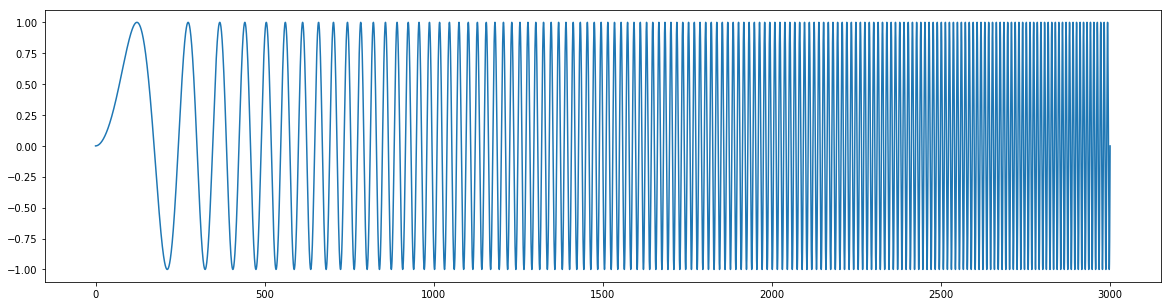

In [8]:
plt.figure(figsize=(20,5))
plt.plot(Sim_t, Chirp_signal)
plt.show()

Let's create a function for the chirp stimulation

In [9]:
def gen_chirp(Chirp_init_freq=None, Chirp_init_time=None, Chirp_end_freq=None, Chirp_end_time=None, Sim_t=None):
    
    Chirp_signal = np.zeros(Sim_t.shape)

    Chirp_signal_init = np.sin(2 * np.pi * Chirp_init_freq * Sim_t[:int(Chirp_init_time*Sim_fs)]) # the starting of the signal should be with the starting frequency

    Chirp_freqs = np.linspace(Chirp_init_freq, Chirp_end_freq, int(Chirp_end_time*Sim_fs) - int(Chirp_init_time*Sim_fs)) / 2
    Chirp_signal_mid = np.sin(2 * np.pi * Chirp_freqs * Sim_t[int(Chirp_init_time*Sim_fs):int(Chirp_end_time*Sim_fs)])

    Chirp_signal_end = np.sin(2 * np.pi * Chirp_end_freq * Sim_t[int(Chirp_end_time*Sim_fs):]) # the ending should be with the ending frequency

    Chirp_signal[:int(Chirp_init_time*Sim_fs)] = Chirp_signal_init
    Chirp_signal[int(Chirp_init_time*Sim_fs):int(Chirp_end_time*Sim_fs)] = Chirp_signal_mid
    Chirp_signal[int(Chirp_end_time*Sim_fs):] = Chirp_signal_end
    
    return Chirp_signal

In [10]:
chirp_signal = gen_chirp(Chirp_init_freq=.001, Chirp_init_time=0, Chirp_end_freq=.1, Chirp_end_time=Sim_t[-1], Sim_t=Sim_t)

In [11]:
plt.figure(figsize=(20,5))
plt.plot(Sim_t, out)
plt.show()

NameError: name 'out' is not defined

### Slope

In [ ]:
sig = np.zeros(Sim_t.shape)
init_time = 500
remaining_time = Sim_t[init_time*Sim_fs:] - init_time

init_sig = np.ones((init_time*Sim_fs,))
remaining_sig = np.minimum( remaining_time / 500, 1)

sig[:init_time*Sim_fs] = init_sig
sig[init_time*Sim_fs:] = remaining_sig

In [ ]:
plt.plot(Sim_t, sig)
plt.show()

## Add Stimulation patterns to the functions.py file

In [ ]:
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

Define stimulation properties

In [ ]:
Sim_period = 3000  # ms
Sim_fs = 10000  #Hz

Sim_dt = 1/Sim_fs
Sim_t = np.arange(0,Sim_period,Sim_dt)

### Chirp

In [ ]:
out, freq = fn.gen_chirp(Chirp_init_freq=.001, 
                         Chirp_init_time=0, 
                         Chirp_end_freq=.1, 
                         Chirp_end_time=Sim_t[-1], 
                         time_points=Sim_t)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Sim_t, out)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(freq, out)
plt.show()

print(out.shape, freq.shape)

### Sinusoid

In [ ]:
out = fn.gen_sin(init_time=500,
                 freq=0.001,
                 phase=-100,
                 time_points=Sim_t)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Sim_t, out)
plt.show()

### Pulse

In [ ]:
out = fn.gen_pulse(init_time=500,
                   on_width=10, # width of "ON" state
                   off_width=50, # width of "OFF" state
                   time_points=Sim_t)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Sim_t, out)
plt.show()

In [ ]:
out = fn.gen_pulse(init_time=500,
                   on_width=2400, # width of "ON" state
                   off_width=99, # width of "OFF" state
                   time_points=Sim_t)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Sim_t, out)
plt.show()

In [ ]:
out = fn.gen_slope(init_time=500,
                   end_time= 1000,
                   time_points=Sim_t)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Sim_t, out)
plt.show()